In [16]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
#Getting the independent features
X = df.drop('label', axis = 1)

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
# get dependent features 
y = df['label']

In [7]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [8]:
df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
df = df.dropna()

In [11]:
messages = df.copy()

In [12]:
messages.reset_index(inplace = True)

In [13]:
messages.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [23]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = [] 
for i in range(0, len(messages)):
    review = re.sub('[^a-z-A-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)     

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\psiit\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [24]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu - breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video - breitbart',
 'beno hamon win french socialist parti presidenti nomin - new york time',
 'back-channel plan ukrain russia courtesi trump associ - new york time',
 'obama organ action partner soros-link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success - new york time',
 'well fargo chief abruptli step - new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fb

In [25]:
#applying countvectorizer ie creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000, ngram_range = (1,3))
X = cv.fit_transform(corpus).toarray()

In [26]:
X.shape

(18285, 5000)

In [27]:
y = messages['label']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [29]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid']

In [30]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [34]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())

In [35]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [38]:
import matplotlib.pyplot as plt

In [39]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# MultinomialNB Algorithm

In [40]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [41]:
from sklearn import metrics 
import numpy as np
import itertools

accuracy:   0.901
Confusion matrix, without normalization


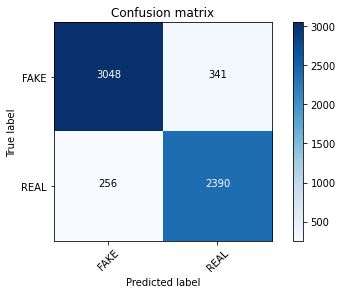

In [43]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [46]:
y_train.shape

(12250,)

# Passive Aggressive Classifier Algorithm

In [51]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

accuracy:   0.921
Confusion matrix, without normalization


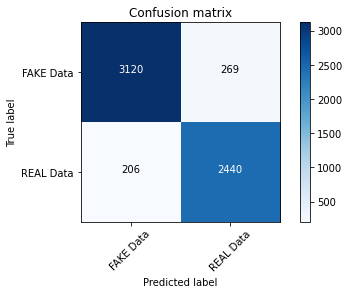

In [52]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

# Mulyinomial classifier with hyperparameters

In [53]:
classifier = MultinomialNB(alpha = 0.1)

In [54]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier = sub_classifier
    print("Alpha: {}, Score: {}".format(alpha, score))

C:\Users\psiit\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score: 0.8886495443247722
Alpha: 0.1, Score: 0.9009113504556753
Alpha: 0.2, Score: 0.9005799502899752
Alpha: 0.30000000000000004, Score: 0.9002485501242751
Alpha: 0.4, Score: 0.8994200497100249
Alpha: 0.5, Score: 0.899917149958575
Alpha: 0.6000000000000001, Score: 0.9002485501242751
Alpha: 0.7000000000000001, Score: 0.9009113504556753
Alpha: 0.8, Score: 0.899751449875725
Alpha: 0.9, Score: 0.9004142502071251


In [55]:
feature_names = cv.get_feature_names()

In [56]:
classifier.coef_[0]

array([ -9.09822238,  -8.62059483,  -9.09822238, ..., -10.7928181 ,
        -8.91250524,  -9.32648103])

In [57]:
# Most Real
sorted(zip(classifier.coef_[0], feature_names), reverse = True)[:20]

[(-3.997982703835758, 'trump'),
 (-4.289029055829791, 'hillari'),
 (-4.396073649945432, 'clinton'),
 (-4.897803273439508, 'elect'),
 (-5.1744321481285285, 'new'),
 (-5.23256391357954, 'comment'),
 (-5.271801728204403, 'video'),
 (-5.384650315348784, 'war'),
 (-5.399695734561153, 'us'),
 (-5.409853262219178, 'hillari clinton'),
 (-5.414970980656158, 'fbi'),
 (-5.478518031772853, 'vote'),
 (-5.5640890230861775, 'email'),
 (-5.576072389973274, 'world'),
 (-5.631848927430686, 'obama'),
 (-5.732335003003676, 'donald'),
 (-5.760928802370417, 'donald trump'),
 (-5.782923823955963, 'russia'),
 (-5.844058212449331, 'day'),
 (-5.859944170038141, 'america')]

In [58]:
# most real
sorted(zip(classifier.coef_[0], feature_names), )[:20]

[(-10.7928181028275, 'abe'),
 (-10.7928181028275, 'abroad'),
 (-10.7928181028275, 'abus new'),
 (-10.7928181028275, 'abus new york'),
 (-10.7928181028275, 'act new'),
 (-10.7928181028275, 'act new york'),
 (-10.7928181028275, 'advic'),
 (-10.7928181028275, 'advis new'),
 (-10.7928181028275, 'advis new york'),
 (-10.7928181028275, 'afford care'),
 (-10.7928181028275, 'afford care act'),
 (-10.7928181028275, 'age new'),
 (-10.7928181028275, 'age new york'),
 (-10.7928181028275, 'agenda breitbart'),
 (-10.7928181028275, 'ail'),
 (-10.7928181028275, 'aleppo new'),
 (-10.7928181028275, 'aleppo new york'),
 (-10.7928181028275, 'ali'),
 (-10.7928181028275, 'america breitbart'),
 (-10.7928181028275, 'america new york')]